In [37]:
import os

# Modify Caption Data

In [16]:
import json

In [30]:
with open('data/coco/captions_train2017.json') as f:
    b = json.loads(f.read())

In [31]:
for i in range(6):
    b['annotations'][i]['caption'] += ' placeholder'

In [32]:
b['annotations'][1]['caption']

'A room with blue walls and a white sink and door. placeholder'

In [33]:
with open('data/coco/expt.json', 'w') as f:
    f.write(json.dumps(b))

In [23]:
import nltk

In [26]:
nltk.tokenize.word_tokenize('I have a @@MASK@@', language='english')


['I', 'have', 'a', '@', '@', 'MASK', '@', '@']

# Modify Image Features

In [1]:
import h5py

In [8]:
hf = h5py.File('data/coco_val2017_vg_detector_features_adaptive.h5', 'r+')

In [3]:
list(hf.keys())

['boxes', 'features', 'height', 'image_id', 'num_boxes', 'width']

In [10]:
hf['width'][0] = 480

In [11]:
hf.close()

# Detectron (use pytorch_p38)

In [2]:
import torch, torchvision

# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from matplotlib import pyplot as plt
# from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [23]:
with open('data/coco_classnames.txt') as f:
    import ast
    coco_labels = ast.literal_eval(f.read())

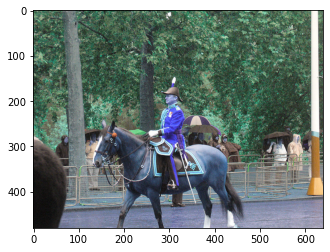

In [7]:
im = cv2.imread('data/000000439715.jpg')

plt.imshow(im)
plt.show()

In [8]:
cfg = get_cfg()
cfg.MODEL.DEVICE='cpu'
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

model_final_f10217.pkl: 178MB [00:04, 38.8MB/s]                              
/home/ubuntu/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/home/ubuntu/anaconda3/envs/pytorch_p38/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272172048/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-def

In [16]:
outputs['instances'].pred_classes

tensor([17,  0,  0,  0,  0,  0,  0,  0, 25,  0, 25, 25,  0,  0, 24])

In [17]:
outputs['instances'].pred_boxes

Boxes(tensor([[126.6035, 244.8977, 459.8291, 480.0000],
        [251.1083, 157.8127, 338.9731, 413.6379],
        [114.8496, 268.6864, 148.2352, 398.8111],
        [  0.8217, 281.0327,  78.6072, 478.4210],
        [ 49.3954, 274.1229,  80.1545, 342.9808],
        [561.2248, 271.5816, 596.2755, 385.2552],
        [385.9072, 270.3125, 413.7130, 304.0397],
        [515.9295, 278.3743, 562.2792, 389.3803],
        [335.2409, 251.9167, 414.7491, 275.9375],
        [350.9300, 269.2060, 386.0984, 297.9081],
        [331.6292, 230.9996, 393.2759, 257.2009],
        [510.7348, 263.2656, 570.9865, 295.9194],
        [409.0841, 271.8646, 460.5582, 356.8722],
        [506.8767, 283.3257, 529.9403, 324.0391],
        [594.5663, 283.4820, 609.0577, 311.4124]]))